In [1]:
import numpy as np
from scipy.stats import ttest_1samp
from tqdm import tqdm
import pickle
# see https://stackoverflow.com/questions/3685265/how-to-write-a-multidimensional-array-to-a-text-file

# parameters
in_data = "/home/lukeh/LabData/Lab_LucaC/HumanConnectomeProject/derivatives/fc/"
label_file = "/home/lukeh/LabData/Lab_LucaC/Luke/Backups/hpc_backups/parcellations/Tian2020MSA_2023/3T/Cortex-Subcortex/Schaefer2018_400Parcels_7Networks_order_Tian_Subcortex_S4_label.txt"
n_rois = 454

parcel_labels = []
with open(label_file, 'r') as f:
    for count, line in enumerate(f, start=0):
        if count % 2 == 0:
            parcel_labels.append(line.split('\n')[0])

# load subject
subject_list = np.loadtxt('287_unrelated_participants.txt', dtype=str)
subject_list = subject_list[0:250]

# get fc
fc_mats = np.empty((n_rois, n_rois, len(subject_list)))
for i, sid in tqdm(enumerate(subject_list)):
    file = f"{in_data}sub-{sid}/sub-{sid}_task-rest_run-all_dir-all_parc-Schaefer2018_400Parcels_7Networks_order_Tian_Subcortex_S4_method-correlation.csv"
    #filef"{path}sub-{s}/sub-{s}_task-rest_run-1_dir-LR_parc-Schaefer2018_100Parcels_7Networks_order_Tian_Subcortex_S1.csv"
    
    fc = np.loadtxt(file, delimiter=',')
    fc[np.diag_indices_from(fc)] = np.nan  # Explicitly assign nan to self connections
    fc_mats[:, :, i] = fc.copy()

output = open('../../data/HCP_fc/fc_mats.pkl', 'wb')
pickle.dump(fc_mats, output)
output.close()

pkl_file = open('../../data/HCP_fc/fc_mats.pkl', 'rb')
fc_mats = pickle.load(pkl_file)
pkl_file.close()

250it [02:04,  2.01it/s]


In [2]:
# import numpy as np
# from scipy.stats import ttest_1samp
# from scipy.signal import detrend
# from nilearn.signal import clean
# from tqdm import tqdm
# import pickle
# # see https://stackoverflow.com/questions/3685265/how-to-write-a-multidimensional-array-to-a-text-file

# # parameters
# in_data = "/home/lukeh/LabData/Lab_LucaC/HumanConnectomeProject/derivatives/timeseries/"
# label_file = "/home/lukeh/LabData/Lab_LucaC/Luke/Backups/hpc_backups/parcellations/Tian2020MSA_2023/3T/Cortex-Subcortex/Schaefer2018_400Parcels_7Networks_order_Tian_Subcortex_S4_label.txt"
# n_rois = 454

# parcel_labels = []
# with open(label_file, 'r') as f:
#     for count, line in enumerate(f, start=0):
#         if count % 2 == 0:
#             parcel_labels.append(line.split('\n')[0])

# # load subject
# subject_list = np.loadtxt('287_unrelated_participants.txt', dtype=str)
# subject_list = subject_list[0:250]

# # get fc
# fc_mats = np.empty((n_rois, n_rois, len(subject_list)))
# for i, sid in tqdm(enumerate(subject_list)):

#     file = f"{in_data}sub-{sid}/sub-{sid}_task-rest_run-1_dir-LR_parc-Schaefer2018_400Parcels_7Networks_order_Tian_Subcortex_S4.csv"
#     ts = np.loadtxt(file, delimiter=',')
#     ts = clean(ts, t_r=0.72, low_pass=0.10, high_pass=0.01)
#     fc1 = np.corrcoef(ts.T)

        
#     file = f"{in_data}sub-{sid}/sub-{sid}_task-rest_run-1_dir-RL_parc-Schaefer2018_400Parcels_7Networks_order_Tian_Subcortex_S4.csv"
#     ts = np.loadtxt(file, delimiter=',')
#     #ts = detrend(ts)
#     ts = clean(ts, t_r=0.72, low_pass=0.10, high_pass=0.01)
#     fc2 = np.corrcoef(ts.T)

#     file = f"{in_data}sub-{sid}/sub-{sid}_task-rest_run-2_dir-LR_parc-Schaefer2018_400Parcels_7Networks_order_Tian_Subcortex_S4.csv"
#     ts = np.loadtxt(file, delimiter=',')
#     #ts = detrend(ts)
#     ts = clean(ts, t_r=0.72, low_pass=0.10, high_pass=0.01)
#     fc3 = np.corrcoef(ts.T)

#     file = f"{in_data}sub-{sid}/sub-{sid}_task-rest_run-2_dir-RL_parc-Schaefer2018_400Parcels_7Networks_order_Tian_Subcortex_S4.csv"
#     ts = np.loadtxt(file, delimiter=',')
#     #ts = detrend(ts)
#     ts = clean(ts, t_r=0.72, low_pass=0.10, high_pass=0.01)
#     fc4 = np.corrcoef(ts.T)

#     fc = np.mean(np.stack((fc1, fc2, fc3, fc4), axis=2), axis=2)
#     fc[np.diag_indices_from(fc)] = np.nan  # Explicitly assign nan to self connections
#     fc_mats[:, :, i] = fc.copy()


# # output = open('../../data/HCP_fc/fc_mats.pkl', 'wb')
# # pickle.dump(fc_mats, output)
# # output.close()

# # pkl_file = open('../../data/HCP_fc/fc_mats.pkl', 'rb')
# # fc_mats = pickle.load(pkl_file)
# # pkl_file.close()

In [3]:
# import numpy as np
# from scipy.stats import ttest_1samp
# from scipy.signal import detrend
# from nilearn.signal import clean
# from tqdm import tqdm
# import pickle
# # see https://stackoverflow.com/questions/3685265/how-to-write-a-multidimensional-array-to-a-text-file

# # parameters
# in_data = "/home/lukeh/LabData/Lab_LucaC/HumanConnectomeProject/derivatives/timeseries/"
# label_file = "/home/lukeh/LabData/Lab_LucaC/Luke/Backups/hpc_backups/parcellations/Tian2020MSA_2023/3T/Cortex-Subcortex/Schaefer2018_400Parcels_7Networks_order_Tian_Subcortex_S4_label.txt"
# n_rois = 454

# parcel_labels = []
# with open(label_file, 'r') as f:
#     for count, line in enumerate(f, start=0):
#         if count % 2 == 0:
#             parcel_labels.append(line.split('\n')[0])

# # load subject
# subject_list = np.loadtxt('287_unrelated_participants.txt', dtype=str)
# subject_list = subject_list[0:250]

# # get fc
# fc_mats = np.empty((n_rois, n_rois, len(subject_list)))
# for i, sid in tqdm(enumerate(subject_list)):

#     file = f"{in_data}sub-{sid}/sub-{sid}_task-rest_run-1_dir-LR_parc-Schaefer2018_400Parcels_7Networks_order_Tian_Subcortex_S4.csv"
#     ts = np.loadtxt(file, delimiter=',')
#     ts1 = clean(ts, t_r=0.72, low_pass=0.10, high_pass=0.01)
#     #fc1 = np.corrcoef(ts.T)

        
#     file = f"{in_data}sub-{sid}/sub-{sid}_task-rest_run-1_dir-RL_parc-Schaefer2018_400Parcels_7Networks_order_Tian_Subcortex_S4.csv"
#     ts = np.loadtxt(file, delimiter=',')
#     #ts = detrend(ts)
#     ts2 = clean(ts, t_r=0.72, low_pass=0.10, high_pass=0.01)
#     #fc2 = np.corrcoef(ts.T)

#     file = f"{in_data}sub-{sid}/sub-{sid}_task-rest_run-2_dir-LR_parc-Schaefer2018_400Parcels_7Networks_order_Tian_Subcortex_S4.csv"
#     ts = np.loadtxt(file, delimiter=',')
#     #ts = detrend(ts)
#     ts3 = clean(ts, t_r=0.72, low_pass=0.10, high_pass=0.01)
#     #fc3 = np.corrcoef(ts.T)

#     file = f"{in_data}sub-{sid}/sub-{sid}_task-rest_run-2_dir-RL_parc-Schaefer2018_400Parcels_7Networks_order_Tian_Subcortex_S4.csv"
#     ts = np.loadtxt(file, delimiter=',')
#     #ts = detrend(ts)
#     ts4 = clean(ts, t_r=0.72, low_pass=0.10, high_pass=0.01)

#     ts_all = np.vstack((ts1, ts2, ts3, ts4))
#     fc = np.corrcoef(ts_all.T)
#     fc[np.diag_indices_from(fc)] = np.nan  # Explicitly assign nan to self connections
#     fc_mats[:, :, i] = fc.copy()


# # output = open('../../data/HCP_fc/fc_mats.pkl', 'wb')
# # pickle.dump(fc_mats, output)
# # output.close()

# # pkl_file = open('../../data/HCP_fc/fc_mats.pkl', 'rb')
# # fc_mats = pickle.load(pkl_file)
# # pkl_file.close()

In [4]:
from src.utils import array_to_mat
from scipy.stats import zscore
# z score r values
fc_mats_z = np.zeros((fc_mats.shape))
for i, sid in tqdm(enumerate(subject_list)):
    fc = fc_mats[:, :, i]

    # index into a vector
    index = np.tril(np.ones(fc.shape[0]), k=-1)
    fc_arr = fc[index==1]
    fc_arr_z = zscore(fc_arr)

    fc_z = array_to_mat(fc_arr_z, N=fc.shape[0])
    fc_mats_z[:, :, i] = fc_z.copy()

250it [00:01, 180.97it/s]


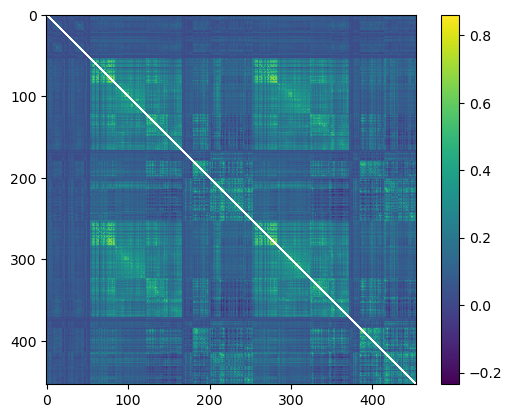

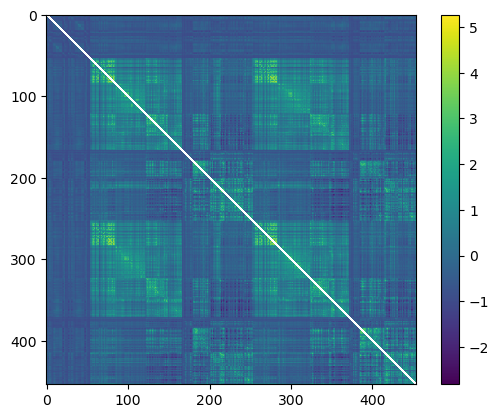

In [5]:
import matplotlib.pyplot as plt
plt.imshow(np.mean(fc_mats, axis=2))
plt.colorbar()
plt.show()

plt.imshow(np.mean(fc_mats_z, axis=2))
plt.colorbar()
plt.show()

# Seeds
## Ye's parcel ids:
- NAc-shell-rh/lh (right hemisphere / left hemisphere)
- PUT-VA-rh/lh
- CAU-DA-rh/lh
- PUT-DP-rh/lh

## Corresponds to Seb's:
- NACC
- Ventral Putamen
- Dorsal Caudate
- Dorsal Putamen


In [8]:
fc_mats_z.shape

(454, 454, 250)

In [7]:
# Ye's seeds
seeds = [23, 50,
         17, 44,
         12, 39,
         15, 42]

# Let's just save every possible seed, for null models later...
for seed in range(454):
    # get seed-specific data
    data = fc_mats_z[seed, :, :].T

    # perform t-test
    result = ttest_1samp(data, popmean=0)

    # save the cortical (400) t vals
    tvals = result.statistic[54::]
    np.savetxt(f"../../results/HCP_roi/{parcel_labels[seed]}_{seed}_fc_tvals_parc-order.csv", 
               tvals, delimiter=',')
    
    # save the mean functional connectivity (z) values as well
    np.savetxt(f"../../results/HCP_roi/{parcel_labels[seed]}_{seed}_fc_zvals_parc-order.csv",
               np.mean(data, axis=0)[54::], delimiter=',')
    
    # sort the t_values high to low
    # note that subcortical data is removed: we only want cortical pathways
    # this reindexes the parcels but this is OK
    # because in the metamatching parcellation it starts with the
    # cortical data
    sorted_tvals = np.argsort(result.statistic[54::])[::-1]

    # save the ordered matrix so that N rois can be grabbed in future
    np.savetxt(f"../../results/HCP_roi/{parcel_labels[seed]}_{seed}_fc_tvals_sorted.csv",
               sorted_tvals, delimiter=',')
    
    # save the mean functional connectivity (r) values as well
    data = fc_mats[seed, :, :].T
    np.savetxt(f"../../results/HCP_roi/{parcel_labels[seed]}_{seed}_fc_rvals_parc-order.csv",
               np.mean(data, axis=0)[54::], delimiter=',')

